In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import oseti
analyzer = oseti.Analyzer()

In [8]:
# 投稿内容の感情スコアを返す関数を定義
def sentimentize(text, analyzer=analyzer):
    # 文単位の感情スコアを取得
    sent_list = analyzer.analyze(text)
    # 感情スコアの平均値を取得
    sent_score = sum(sent_list) / len(sent_list)
    return sent_score
analyzer.word_dict
analyzer.wago_dict


{'あがく': 'ネガ（経験）',
 'あきらめる': 'ネガ（経験）',
 'あきる': 'ネガ（経験）',
 'あきれる': 'ネガ（経験）',
 'あきれる た': 'ネガ（経験）',
 'あせる': 'ネガ（経験）',
 'あなどる': 'ネガ（経験）',
 'あやしむ': 'ネガ（経験）',
 'あやぶむ': 'ネガ（経験）',
 'あやまる': 'ネガ（経験）',
 'あらそ う': 'ネガ（経験）',
 'あわてる': 'ネガ（経験）',
 'いたたまれない': 'ネガ（経験）',
 'いたむ': 'ネガ（経験）',
 'いつわる': 'ネガ（経験）',
 'いらだたしい': 'ネガ（経験）',
 'いら立つ': 'ネガ（経験）',
 'うつうつ': 'ネガ（経験）',
 'うなだれる': 'ネガ（経験）',
 'うなる': 'ネガ（経験）',
 'うらむ': 'ネガ（経験）',
 'うんざり': 'ネガ（経験）',
 'おちいる': 'ネガ（経験）',
 'おぼれる': 'ネガ（経験）',
 'かさばる': 'ネガ（経験）',
 'かなしむ': 'ネガ（経験）',
 'がたつく': 'ネガ（経験）',
 'がっくり': 'ネガ（経験）',
 'くさる': 'ネガ（経験）',
 'くずれる': 'ネガ（経験）',
 'くたびれる': 'ネガ（経験）',
 'くやむ': 'ネガ（経験）',
 'くるしむ': 'ネガ（経験）',
 'けだるい': 'ネガ（経験）',
 'こじらせる': 'ネガ（経験）',
 'こそばゆい': 'ネガ（経験）',
 'こぼす': 'ネガ（経験）',
 'こまる': 'ネガ（経験）',
 'こりる': 'ネガ（経験）',
 'こわさ れる': 'ネガ（経験）',
 'さじ を 投げる': 'ネガ（経験）',
 'しから れる': 'ネガ（経験）',
 'しくじる': 'ネガ（経験）',
 'しょぼくれる た': 'ネガ（経験）',
 'しょんぼり': 'ネガ（経験）',
 'しんみり': 'ネガ（経験）',
 'せんない': 'ネガ（経験）',
 'たおれる': 'ネガ（経験）',
 'ためらう': 'ネガ（経験）',
 'だま すれ る': 'ネガ（経験）',
 'だます': 'ネガ（経験）',
 'だれる': 'ネガ（経験

In [9]:
def emotions(bt):
    bt = bt.sort_values('時間')
    bt["sentiment"] = bt["本文"].apply(sentimentize)
    bt
    # 感情を6段階に分類
    # 段階分けする境界値を設定
    sent_grades = [-np.inf, -0.2, -0.001, 0.001, 0.2, 0.4, 0.6, np.inf]
    # 各段階の名称を設定
    sent_labels = ["0_ex_negative", "1_bit_negative", "2_neutral", "3_bit_positive",
                   "4_mid_positive", "5_so_positive", "6_ex_positive"]
    # 感情スコアを段階分け
    bt["sent_category"] = pd.cut(bt["sentiment"],
            bins=sent_grades,
            labels=sent_labels)

    # 感情を6段階に分類
    bt["sent_category"].value_counts().sort_index()
    # 段階分けする境界値を設定
    bt_sent_history = bt.set_index("時間").resample("300s").aggregate({"sent_category":"value_counts"}).unstack()
    # プロット領域を設定
    fig, ax = plt.subplots(figsize=(30,10))
    # 積み上げ面プロットで集計結果を可視化
    bt_sent_history.plot(stacked=True, ax=ax, kind="area")

In [10]:
hauru = pd.read_csv('data_csv/ハウルの動く城.csv',parse_dates=["時間"])
baton = pd.read_csv('data_csv/そしてバトンは渡された.csv',parse_dates=['時間'])

c:\Users\rickk\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rickk\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


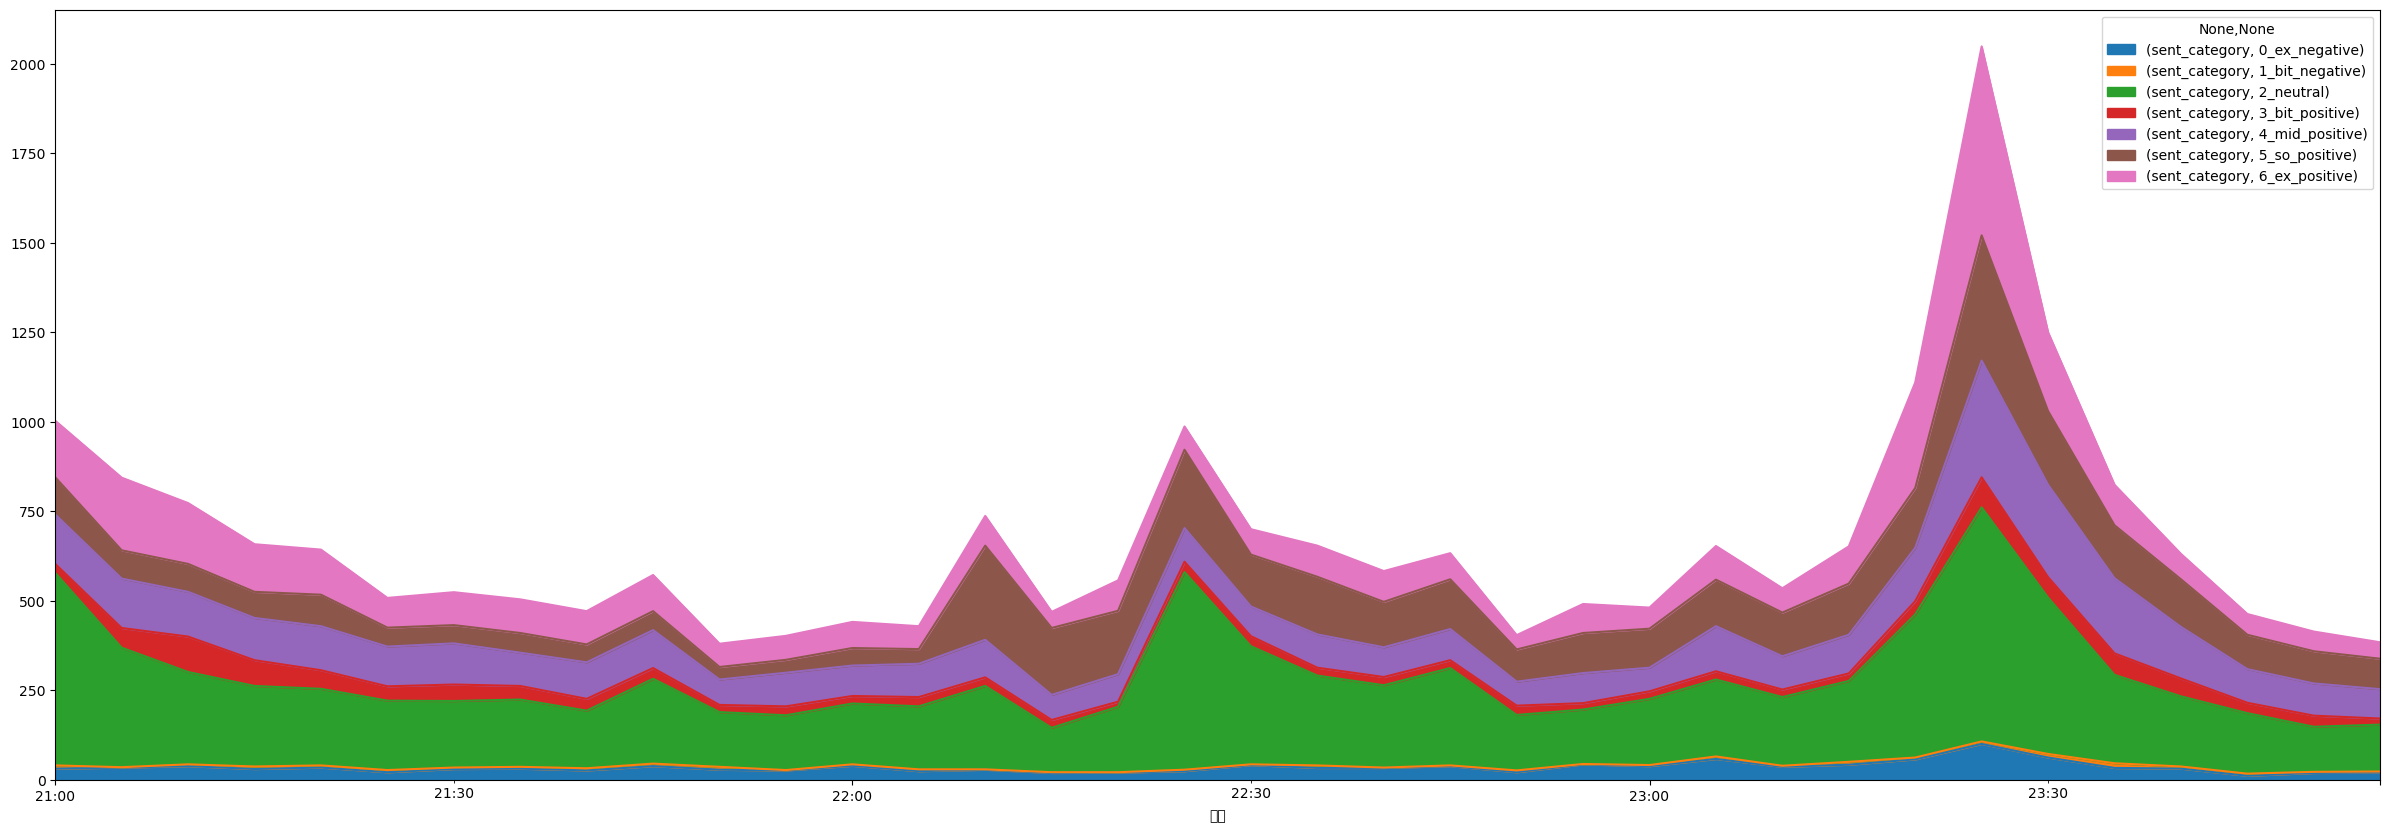

In [13]:
emotions(hauru)

c:\Users\rickk\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rickk\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


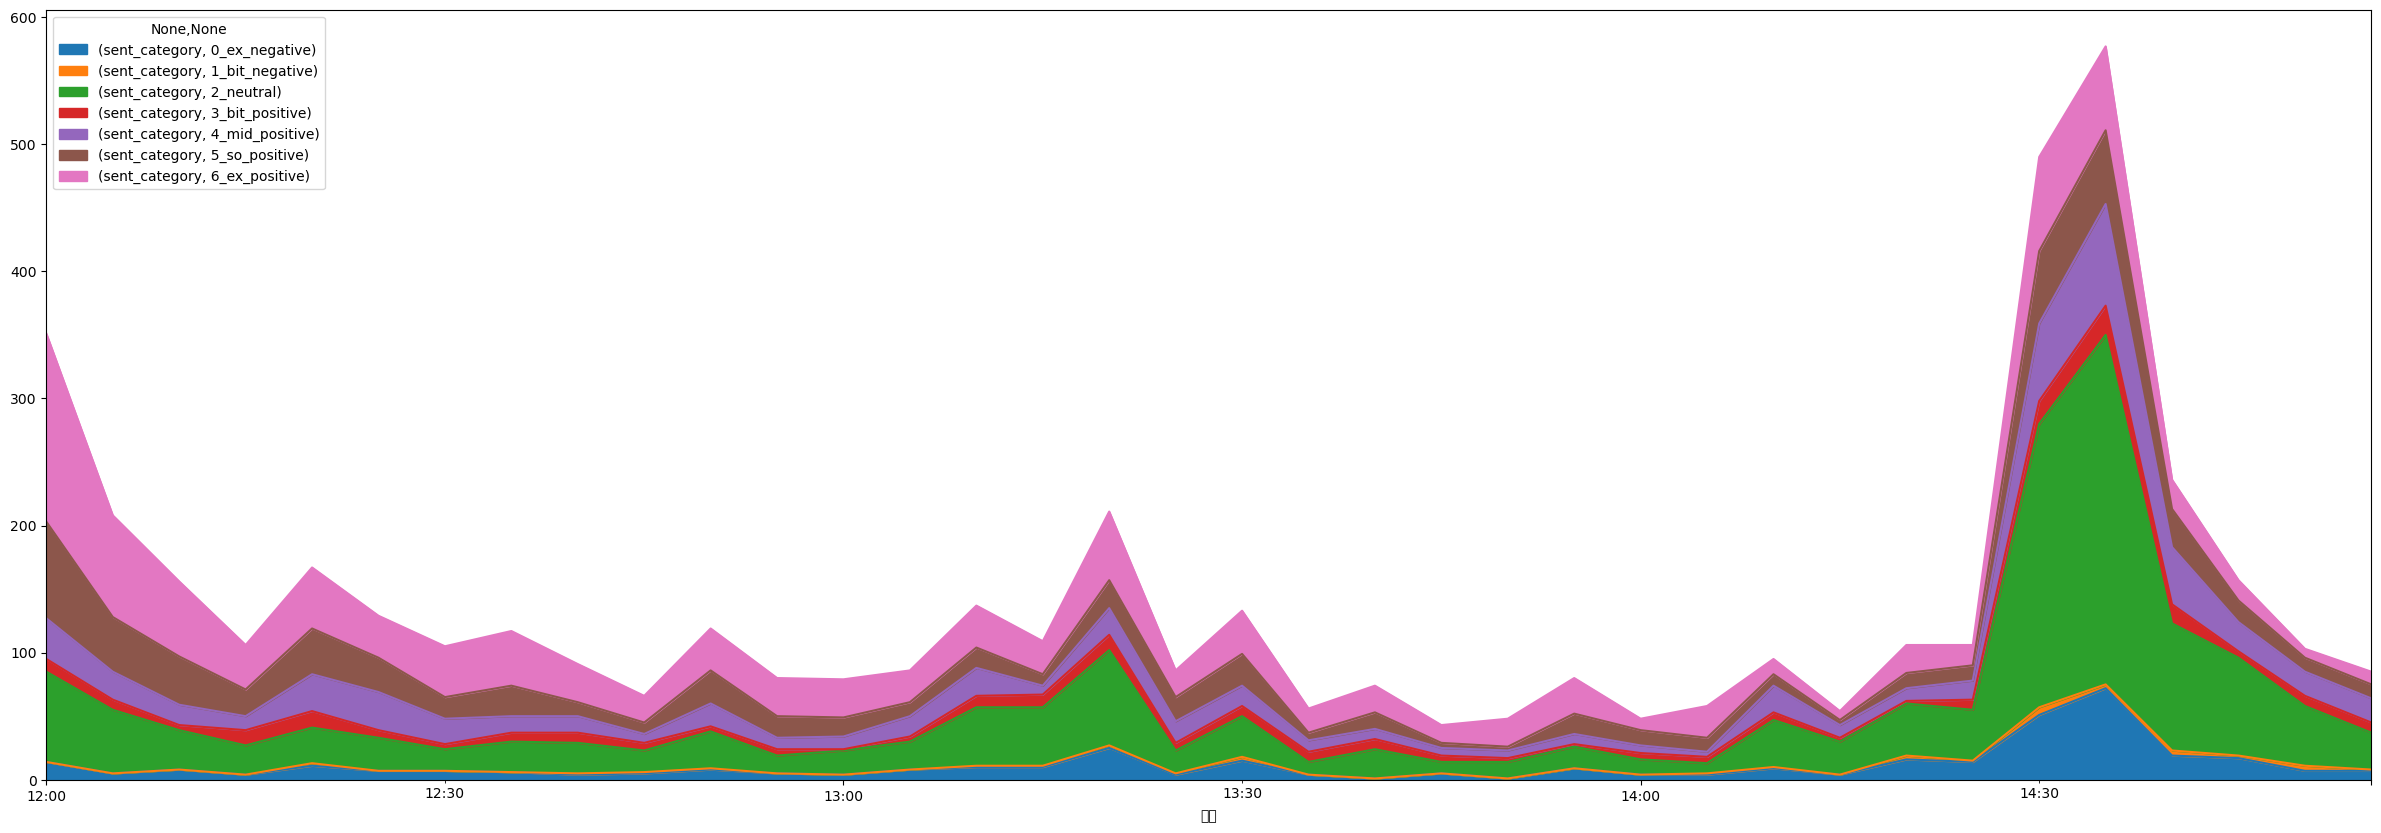

In [12]:
emotions(baton)